# Stock Prediction

In this article I use LSTM for predicting stock prices; 


## Some preliminaries
Either

* If you like to full experience including fresh data download or customize, then you must
get the API key from AlphaVantage [https://www.alphavantage.co/support/#api-key] to download data;

OR

* Use the data same data to learn about multivariate prediction first and then you can download later.

if you choose to use Alpha Vantage pip install as follows:

```
pip install alpha_vantage
pip install git+https://github.com/RomelTorres/alpha_vantage.git@develop
```

Follow along until you create the dataset; but you have a choice to use the already processed data.
Just skip everything and just use **data/stockdata.csv** for moving ahead with LSTM.
Later I will add news media, sentiments etc.

If you really are interested in pulling data from AlphaVantage, scripts are in **gen/getstocksdata.py** 


## References

1. [https://towardsdatascience.com/getting-rich-quick-with-machine-learning-and-stock-market-predictions-696802da94fe]

2. [https://towardsdatascience.com/step-by-step-understanding-lstm-autoencoder-layers-ffab055b6352]




## Data Preprocessing.

In order to process data through LSTM, the input must be transformed appropriately.
Following transformations are performed to make the input data is suitable for LSTM.


1. Scale the numerical sensors using standard scaler or Min-Max Scaler \
**IMPORTANTANT**: ONLY Scale based on training set - not including the test set.


2. Convert categorial variables to one-hot encoding only if the number of unique values are \
greater than 2 and less than some pre-specified number, say 4 or 3


3. create a new data-set of \
    a. scaled numerical sensors \
    b. binary categorical variable - not needing One-hot-encoding \
    c. One-hot encoded new columns.
    

4. Prepare a dataset for LSTM using Time Series Generator - using history \
CAREFUL: ensure the oldest is the first one.


5. Keep track of all of the above carefully for predictions when needed in the future. \
Save them to disk so it can be recovered for newer training or predictions




I assume you have the data ready in "data/stockdata_ext.csv"


In "stockdata_ext.csv" I have added a dummy columns with categorical variable to show the processing

#STEP1 is to create a configuratio file 
Run
```
$  gen/dataconfig.py data/stockdata_ext.csv > config.1
```

This will create a configuration file - review config.1 
We will modify it so it we can run a model on simpler datset

```
$ cp config.1 config.2

```

Copy the configuration file as aboveand edit config.2 to contain
This is a configuration file for dataprocess.py to use limited columns and
Add difference columns

--- CONTENTS of config.2

```
[START]
{ 
"numericCols"  : ['MSFT_open', 'MSFT_high', 'MSFT_low', 'MSFT_close', 'MSFT_volume', 'MSFT_open_diff1'],
"addDiffs"     : ['MSFT_open'],
"scale"        : 1
}
[END]
```


Run the following to create a new configuration file 

```
$ gen/dataprepare.py -c config\* data/stockdata_ext.csv > myconfig

```

Inspect myconfig ==> This can be used for preparing additonal datasets infuture 
by default dataprepare.py - creates a file called out.txt for you to use directly in LSTM
it would do the following

* STEP 0: Add Differecing Columns
* STEP 1. --> Scale all Numeric Columns if scaler exists
** STEP 2: => One hot encode 
* STEP 3: Get Binary columns
* FINALLY: Concatenate all the data

* Finally it will drop all columns with no data
* and forward-fill, backwardfill 

Finally, the last command you ran, "...gen/dataprepare.py ...", creates a file out.txt that we can finally use it for our LSTM.


### What happend.

We create a configuration file for processing the file so that it can be used for generating data for LSTM consistently.

the file configuration file "myconfig" contents are:

```
#Getting Configuration from config.1
#Getting Configuration from config.2
=>Processing 1/1 ../data/stockdata_ext.csv - standby
[START]
{
{
              "file": ['/opt/SCHAS/NNBook/notebooks/NNetworks/LSTM/data/stockdata_ext.csv'],
     "number_Unique": 6,
      "constantCols": [],
       "categorCols": ['MSFT_-ve', 'MSFT_+ve'],
       "onehotECols": ['MSFT_+ve'],
        "binaryCols": ['MSFT_-ve'],
       "numericCols": ['MSFT_open', 'MSFT_high', 'MSFT_low', 'MSFT_close', 'MSFT_volume', 'MSFT_open_diff1'],
       "notNumerics": ['timestamp'],
    "timeCorrelated": 0.94,
      "timeCorrCols": [],
    "timeCorrLength": 0,
    "excludePattern": [],
    "includePattern": [],
       "dropColumns": [],
      "finalColumns": ['binaryCols', 'numericCols', 'onehotECols'],
      "scalerString": ['gANjc2tsZWF... OMITTED...uM3EudWIu'],
          "addDiffs": ['MSFT_open'],
         "train_pct": 0.7,
       "train_count": 3671,
               "end": 0,
             "scale": 1,
        "predictors": ['MSFT_-ve', 'MSFT_open', 'MSFT_high', 'MSFT_low', 'MSFT_close', 'MSFT_volume', 'MSFT_+ve__S__0', 'MSFT_+ve__S__1', 'MSFT_+ve__S__2'],
       "outputsCols": ['MSFT_open', 'MSFT_open_diff1'],
          "tsParams": {'length': 5, 'batch_size': 1, 'stride': 1, 'sampling_rate': 1},
     "predictLength": 5,
            "nsteps": 1,
            "scaler": [],
        "resultCols": ['MSFT_-ve', 'MSFT_open', 'MSFT_high', 'MSFT_low', 'MSFT_close', 'MSFT_volume', 'MSFT_open_diff1', 'MSFT_+ve__S__0', 'MSFT_+ve__S__1', 'MSFT_+ve__S__2'],
"end": 0
}
[END]
}

[END]

```

In [ ]:
'''
technical_indicators = np.array([[1,1]])
# define two sets of inputs
lstm_input = Input(shape=(lookBack, nFeatures), name='lstm_input')
dense_input = Input(shape=(technical_indicators.shape[1],), name='tech_input')

# the first branch operates on the first input
x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
lstm_branch = Model(inputs=lstm_input, outputs=x)

# the second branch opreates on the second input
y = Dense(20, name='tech_dense_0')(dense_input)
y = Activation("relu", name='tech_relu_0')(y)
y = Dropout(0.2, name='tech_dropout_0')(y)
technical_indicators_branch = Model(inputs=dense_input, outputs=y)

# combine the output of the two branches
combined = concatenate([lstm_branch.output, technical_indicators_branch.output], name='concatenate')

z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
z = Dense(1, activation="linear", name='dense_out')(z)

# our model will accept the inputs of the two branches and
# then output a single value
model2 = Model(inputs=[lstm_branch.input, technical_indicators_branch.input], outputs=z)
adam = optimizers.Adam(lr=0.0005)
model2.compile(optimizer=adam, loss='mse')
''';

In [2]:
import keras
import tensorflow as tf
import numpy as np
np.random.seed(4)
import base64, os, json, glob
from sklearn import preprocessing
from Crypto.Cipher import AES
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 5)
mpl.rcParams['axes.grid'] = False
pd.options.display.max_rows = 5
%matplotlib inline  

use_keras=1
if ( use_keras):
    from keras.models import  Model
    from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, TimeDistributed
    from keras.layers import RepeatVector
    from keras.preprocessing.sequence import TimeseriesGenerator
    from keras import regularizers
    from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, Callback
    from keras import optimizers
    from keras.models import load_model
else:
    from tensorflow.keras.models import Sequential, Model
    from tensorflow.keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, TimeDistributed
    from tensorflow.keras.layers import Conv1D, GlobalMaxPool1D,Flatten, Bidirectional, RepeatVector, MaxPooling1D
    from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
    from tensorflow.keras import regularizers
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, Callback
    from tensorflow.keras import optimizers
    from tensorflow.keras.models import load_model


In [3]:
file="data/stockdata_ext.csv"
df1=pd.read_csv(file)
df=df1[['timestamp', 'MSFT_open', 'MSFT_high', 'MSFT_low', 'MSFT_close']].copy()
col='MSFT_open'
df[f'{col}_diff1'] = df[col] - df[col].shift(-1)
df.dropna(inplace=True)
df=df[:-50]
df

,timestamp,MSFT_open,MSFT_high,MSFT_low,MSFT_close,MSFT_open_diff1
0,2020-02-21,183.17,183.50,177.25,178.59,-3.78
1,2020-02-20,186.95,187.25,181.10,184.42,-1.11
...,...,...,...,...,...,...
5192,2000-03-15,94.56,96.62,93.69,95.37,-4.06
5193,2000-03-14,98.62,99.25,95.12,95.12,1.00


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

train_count = int(0.9 * len(df))
standardScale = 0
if ( standardScale):
    scaler = StandardScaler()
    ltf = df[df.columns[1:]]
    dfs = scaler.fit(ltf[:train_count])
    ltf = (ltf-dfs.mean_)/dfs.scale_
else:
    scaler = preprocessing.MinMaxScaler()
    data = df[df.columns[1:]]
    ltf = scaler.fit_transform(data)
    ltf = pd.DataFrame(ltf)
    ltf.columns = df.columns[1:]

ltf=ltf.reindex(index=ltf.index[::-1])
ltf.to_csv("data/stockdata_ext_prep.csv", index=False)
ltf

,MSFT_open,MSFT_high,MSFT_low,MSFT_close,MSFT_open_diff1
5193,0.475463,0.477667,0.467657,0.460789,0.751590
5192,0.452323,0.462646,0.459324,0.462230,0.590649
...,...,...,...,...,...
1,0.978911,0.980295,0.968706,0.975339,0.684478
0,0.957367,0.958876,0.946270,0.941746,0.599555


In [5]:
tsParams = {'length': 30, 'batch_size': 1, 'stride': 1, 'sampling_rate': 1}
predsI=['MSFT_open', 'MSFT_high', 'MSFT_low', 'MSFT_close']
predsV=['MSFT_open', 'MSFT_open_diff1']
predsV=['MSFT_open']
X = ltf[predsI].values
y = ltf[predsV].values
trng    = TimeseriesGenerator(X[:train_count], y[:train_count], **tsParams )
valg    = TimeseriesGenerator(X[train_count:], y[train_count:], **tsParams )
#X, y,  trng[0]

In [6]:
model1=None      

#sensN = len(self.train_transformed[0].columns)  # number of sensors (eliminating the two time ones)
#outN = len(self.num_id_list) # number of output sensors; the non-categorical ones        

lookBack   = tsParams['length']
nFeatures  = X.shape[1]  # Number of features 
lstm_OPDim = y.shape[1]  # This is usually all sensors except categorical that to train LSTM on
lstm_IPDim = 256
drop       = 0.3
optimizer  = optimizers.Adam(lr=0.0005)
loss       = 'mse'
k_rrizer   = None
r_rrizer   = None

input_layer  = Input(shape=(lookBack, nFeatures), dtype='float32', name='input')
memory_layer = LSTM( lstm_IPDim, return_sequences=True, name="memory1")(input_layer)
memory_layer = LSTM (int(lstm_IPDim/2), return_sequences=False, name="memory2")(memory_layer)
repeated = RepeatVector(lookBack)(memory_layer)
memory_layer = LSTM (int(lstm_IPDim/2), return_sequences=True, name="first1out")(repeated)
memory_layer = LSTM (lstm_IPDim,  return_sequences=True, name="first2out")(memory_layer)
decoded_inputs = TimeDistributed(Dense(units=lstm_OPDim, activation='linear'))( memory_layer)

#  Try spatial dropout?
dropout_input = Dropout(drop)(input_layer)
concat_layer = concatenate([dropout_input, decoded_inputs])

#memory_layer = LSTM (units=self.lstm_dim, return_sequences=False)(concat_layer)
memory_layer = LSTM (units=lstm_IPDim, 
                         kernel_regularizer = k_rrizer, 
                         recurrent_regularizer = r_rrizer, 
                         return_sequences=False)(concat_layer)
preds = Dense(units=lstm_OPDim, activation='linear')(memory_layer)

model1 = Model(input_layer, preds)
model1.compile(optimizer = optimizer, loss= loss)             

print(model1.summary())


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 30, 4)        0                                            
__________________________________________________________________________________________________
memory1 (LSTM)                  (None, 30, 256)      267264      input[0][0]                      
__________________________________________________________________________________________________
memory2 (LSTM)                  (None, 128)          197120      memory1[0][0]                    
__________________________________________________________________________________________________
repeat_vector_1 (RepeatVector)  (None, 30, 128)      0           memory2[0][0]                    
____________________________________________________________________________________________

In [7]:
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose
        self.current = np.inf
        self.best    = self.current

    def on_epoch_end(self, epoch, logs={}):
        self.current = logs.get(self.monitor)
        self.best    = min(self.best, self.current)
        
        if self.current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if self.current < self.value:
            if self.verbose > 0:
                print(f"Epoch:SADA {epoch}: early stopping THR: loss {self.current:10.7}")
            self.model.stop_training = True
            
est= EarlyStoppingByLossVal(monitor='val_loss', value=0.0000001, verbose=1)

In [10]:
cp = ModelCheckpoint(filepath="stockpredictions.h5", monitor='val_loss', save_best_only=True, verbose=1)
tb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True,  write_images=True)


In [11]:
load_weights=0
if ( load_weights and os.path.exists("stockpredictions.h5")):
    model1.load_weights("stockpredictions.h5")
    model1.fit(trng, verbose=1, epochs=1, validation_data=valg,steps_per_epoch=1,
                   validation_steps=50, callbacks=[est])
    #cp.best = est.best
    print(cp.best, est.best, est.current)

In [16]:
model1.fit(trng, verbose=1, epochs=100, validation_data=valg, steps_per_epoch=200, 
                validation_steps=50, workers=4, use_multiprocessing=True, callbacks=[cp, est])    

Epoch 1/100
200/200 [==============================] - 9s 46ms/step - loss: 6.1172e-04 - val_loss: 2.9452e-04

Epoch 00001: val_loss did not improve from 0.0000011
Epoch 2/100
200/200 [==============================] - 9s 45ms/step - loss: 3.6532e-04 - val_loss: 2.9488e-05

Epoch 00002: val_loss did not improve from 0.0000011
Epoch 3/100
200/200 [==============================] - 9s 46ms/step - loss: 5.0760e-04 - val_loss: 0.0012

Epoch 00003: val_loss did not improve from 0.0000011
Epoch 4/100
200/200 [==============================] - 9s 46ms/step - loss: 7.1236e-04 - val_loss: 5.6621e-04

Epoch 00004: val_loss did not improve from 0.0000011
Epoch 5/100
200/200 [==============================] - 9s 46ms/step - loss: 5.6100e-04 - val_loss: 0.0068

Epoch 00005: val_loss did not improve from 0.0000011
Epoch 6/100
200/200 [==============================] - 9s 46ms/step - loss: 5.8841e-04 - val_loss: 0.0085

Epoch 00006: val_loss did not improve from 0.0000011
Epoch 7/100
200/200 [=======

In [14]:
m1 = load_model("stockpredictions.h5")

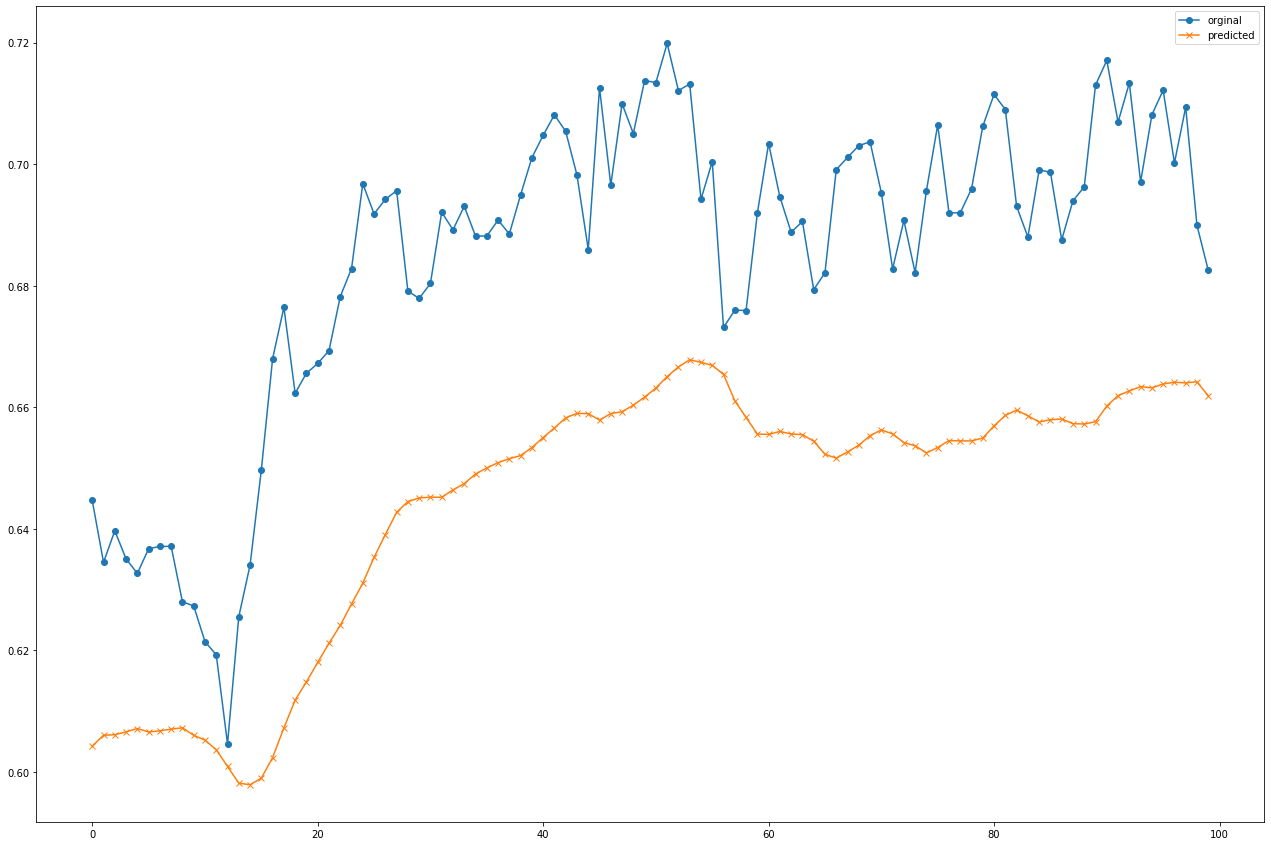

IndexError: index 1 is out of bounds for axis 1 with size 1

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (16, 5)
mpl.rcParams['axes.grid'] = False

'''yp = model1.predict(valg)
#y = ndf[1:][predsV].values
yo= list(valg[0][1])
for i in range(1,len(valg)):
    yo += list(valg[i][1])
yo=np.array(yo)'''


xxt = np.array([valg[i][0][0] for i in range(len(valg))])
yyt = np.array([valg[i][1][0] for i in range(len(valg))])
xxt.shape,  yyt.shape
plt.gcf().set_size_inches(22, 15, forward=True)

yp=m1.predict(xxt)
yo=yyt

f, howmany = -200, 100

plt.plot(yo[:,0][f:f + howmany], marker='o', label="orginal", )
plt.plot(yp[:,0][f:f + howmany], marker='x', label="predicted")
plt.legend()
plt.show()

plt.plot(yo[:,1][f:f + howmany], marker='o', label="orginal", )
plt.plot(yp[:,1][f:f + howmany], marker='x', label="predicted")
plt.legend()
plt.show()